[*********************100%***********************]  3 of 3 completed


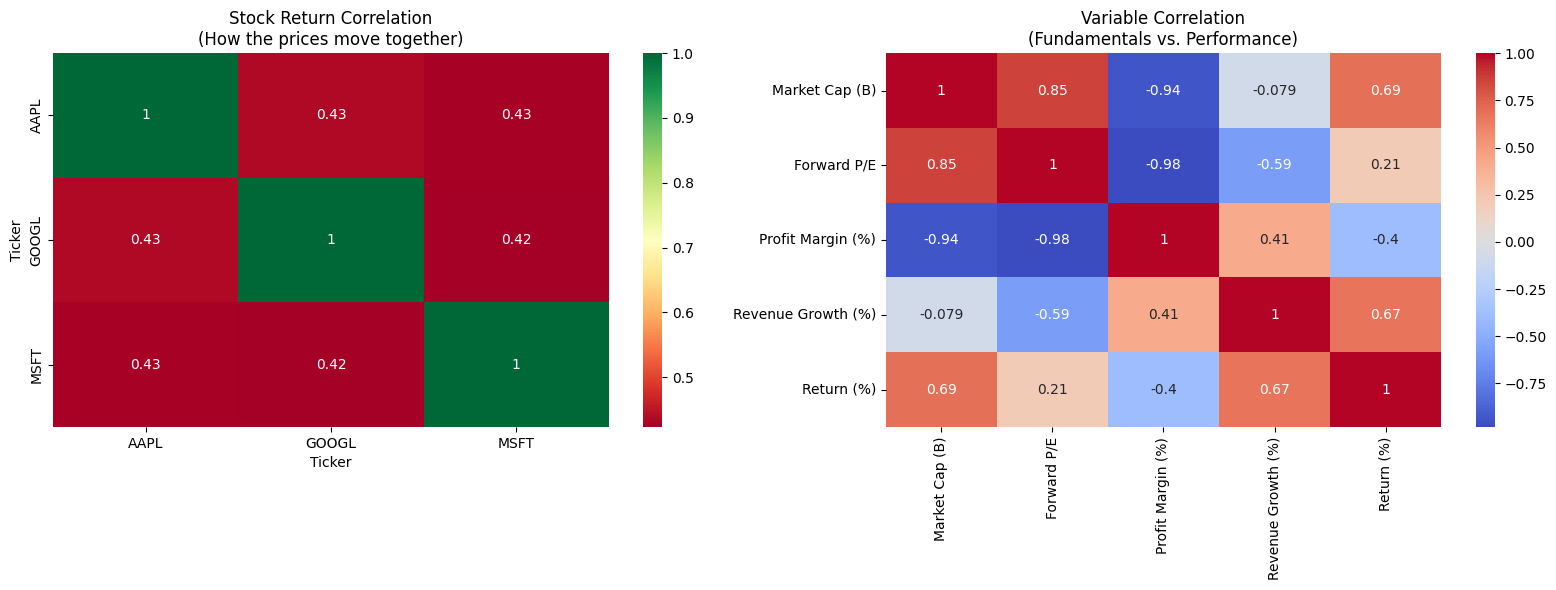

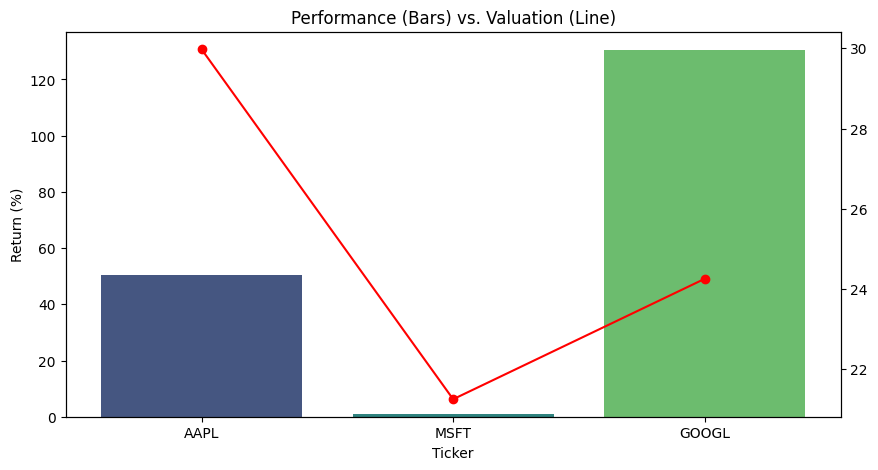

===== SUMMARY DATA =====
        Market Cap (B)  Forward P/E  Profit Margin (%)  Revenue Growth (%)  \
Ticker                                                                       
AAPL       4087.787028    29.974737          27.037000                15.7   
MSFT       2981.424267    21.256594          39.044000                16.7   
GOOGL      3905.637319    24.257076          32.810003                18.0   

        Return (%)  
Ticker              
AAPL     50.244323  
MSFT      0.827411  
GOOGL   130.447324  


In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the tickers
tickers = ['AAPL', 'MSFT', 'GOOGL']

# 1. Fetch Technical Data
raw_data = yf.download(tickers, start="2024-02-01")

# Robust price selection
if 'Adj Close' in raw_data.columns:
    data = raw_data['Adj Close']
else:
    data = raw_data['Close']

# Calculate daily returns for Stock Correlation
daily_returns = data.pct_change().dropna()
# Calculate total period returns for Fundamental Analysis
total_returns = ((data.iloc[-1] / data.iloc[0]) - 1) * 100

# 2. Fetch Fundamental Data
fundamental_data = []
for ticker in tickers:
    stock = yf.Ticker(ticker)
    info = stock.info
    fundamental_data.append({
        'Ticker': ticker,
        'Market Cap (B)': info.get('marketCap', 0) / 1e9,
        'Forward P/E': info.get('forwardPE'),
        'Profit Margin (%)': info.get('profitMargins', 0) * 100,
        'Revenue Growth (%)': info.get('revenueGrowth', 0) * 100,
        'Return (%)': total_returns[ticker]
    })

summary = pd.DataFrame(fundamental_data).set_index('Ticker')

# ======================================================
# 3. VISUALIZATION: CORRELATIONS
# ======================================================

# Create a figure with two heatmaps
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Heatmap 1: Stock Correlation (Price Movement)
stock_corr = daily_returns.corr()
sns.heatmap(stock_corr, annot=True, cmap='RdYlGn', ax=ax1)
ax1.set_title('Stock Return Correlation\n(How the prices move together)')

# Heatmap 2: Variable Correlation (Fundamentals vs Performance)
# We correlate the numeric columns in our summary table
variable_corr = summary.corr()
sns.heatmap(variable_corr, annot=True, cmap='coolwarm', ax=ax2)
ax2.set_title('Variable Correlation\n(Fundamentals vs. Performance)')

plt.tight_layout()
plt.show()

# 4. Performance vs Valuation Chart (from previous step)
plt.figure(figsize=(10, 5))
sns.barplot(x=summary.index, y='Return (%)', data=summary, hue=summary.index, palette='viridis', legend=False)
ax_pe = plt.twinx()
ax_pe.plot(summary.index, summary['Forward P/E'], color='red', marker='o', label='Forward P/E')
plt.title('Performance (Bars) vs. Valuation (Line)')
plt.show()

print("===== SUMMARY DATA =====")
print(summary)